In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
dataset = pd.read_csv('preProcessedData.csv')
dataset.shape

(706, 21)

In [5]:
X = dataset.drop(['Absenteeism'], axis=1)
print(X.head(5))

y = dataset['Absenteeism'].values
print(y[0:5])


ID  Reason_for_absence  Month_of_absence  Day_of_the_week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation_expense  Distance_from_Residence_to_Work  Service_time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work_load_Average/day   Hit_target  Disciplinary_failure  Education  Son  

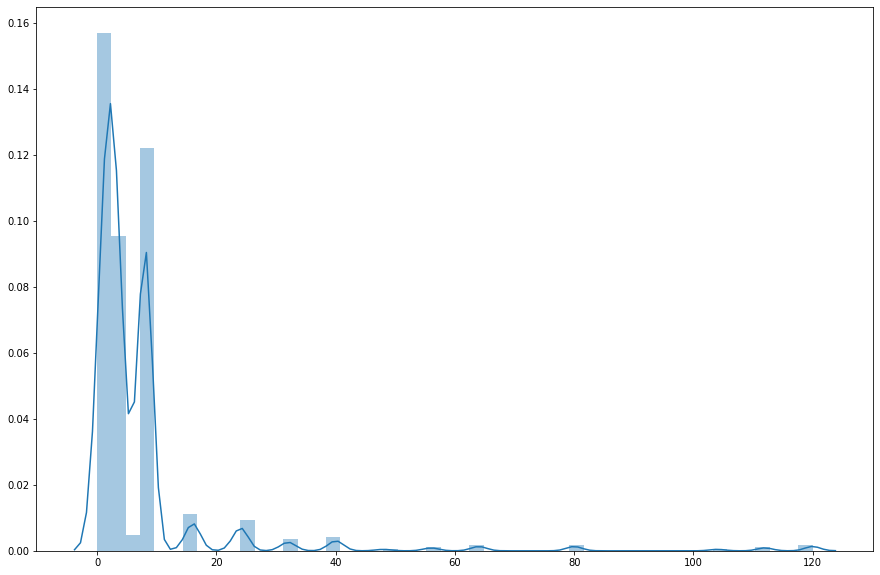

In [7]:
plt.figure(figsize=(15,10))
seabornInstance.distplot(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [9]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
coeff_dataset = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(coeff_dataset)

Coefficient
ID                                 -0.202018
Reason_for_absence                 -0.530614
Month_of_absence                   -0.066787
Day_of_the_week                    -0.822859
Seasons                             0.324870
Transportation_expense             -0.005673
Distance_from_Residence_to_Work    -0.022195
Service_time                       -0.385752
Age                                 0.380296
Work_load_Average/day              -0.015393
Hit_target                          0.063036
Disciplinary_failure              -18.443976
Education                          -2.535342
Son                                 0.987382
Social_drinker                     -0.776352
Social_smoker                      -1.619479
Pet                                -0.745980
Weight                              1.161618
Height                             -0.915821
Bod_mass_index                     -3.741886


In [11]:
y_pred = regressor.predict(X_test)

In [12]:
df = pd.DataFrame({'Actual: ' : y_test, 'Predicted: ' : y_pred})
df1 = df.head(20)
df1

,Actual:,Predicted:
0,1,9.924134
1,0,16.323204
2,8,-1.727303
3,8,6.669843
4,2,4.099997
5,2,1.342275
6,1,2.628824
7,2,1.917159
8,4,6.741062
9,0,1.718438


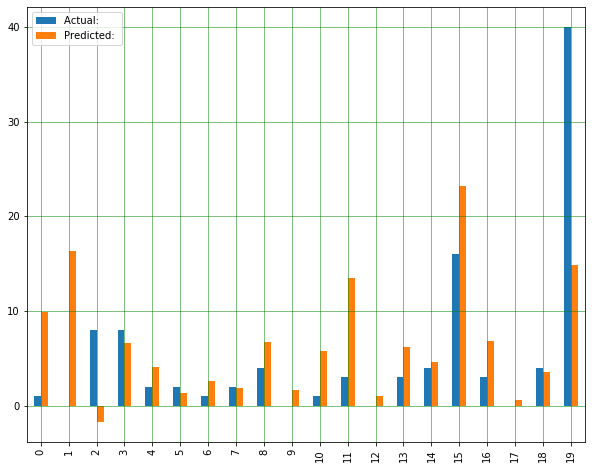

In [13]:
df1.plot(kind='bar', figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

In [14]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  6.090955133910129
Mean Squared Error:  177.95609923027703
Root Mean Squared Error: 13.340018711766376


In [15]:
#TUNE

regressor = LinearRegression(fit_intercept=False)
regressor.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [16]:
coeff_dataset = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(coeff_dataset)

Coefficient
ID                                 -0.168966
Reason_for_absence                 -0.524780
Month_of_absence                    0.030221
Day_of_the_week                    -0.768448
Seasons                             0.115871
Transportation_expense             -0.001876
Distance_from_Residence_to_Work    -0.027129
Service_time                       -0.252262
Age                                 0.340469
Work_load_Average/day              -0.010373
Hit_target                          0.143755
Disciplinary_failure              -18.127138
Education                          -2.137673
Son                                 1.045107
Social_drinker                     -0.719519
Social_smoker                      -2.476828
Pet                                -0.474919
Weight                              0.067236
Height                              0.098865
Bod_mass_index                     -0.559492


In [19]:
y_pred = regressor.predict(X_test)

In [20]:
df = pd.DataFrame({'Actual: ' : y_test, 'Predicted: ' : y_pred})
df1 = df.head(20)
df1

,Actual:,Predicted:
0,1,8.284970
1,0,17.244994
2,8,0.998086
3,8,5.640588
4,2,4.270523
5,2,0.557009
6,1,2.317169
7,2,3.232244
8,4,6.120783
9,0,0.878529


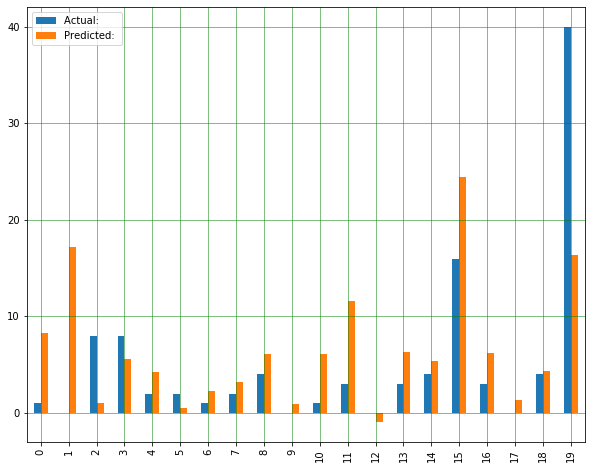

In [22]:
df1.plot(kind='bar', figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

In [23]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  5.988617562989262
Mean Squared Error:  172.26281952320934
Root Mean Squared Error: 13.124893124258548
